Task1_0729. Target Column의 분포를 확인하고 다음 사항을 수행하세요.

- Target을 로그변환 및 X 변수들을 표준화한 후 모델 학습 및 평가
- 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
- 이상치 처리 전후에 대한 모델 평가 결과 비교 설명

In [ ]:
housing = fetch_california_housing()


X = housing.data
y = housing.target
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
import numpy as np
import pandas as pd
from sklearn. datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


X = df.iloc[:,:-1]
y_log = np.log1p(df['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


def evaluate(y_test, y_pred):
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)


    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()


    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error : {mae:.2f}")
    print(f"R-squared : {r2:.2f}")
    print(f"adjusted_r2 : {adjusted_r2:.2f}")
    print(f"Cross-validated RMSE : {cv_rmse:.2f}")

evaluate(y_test,y_pred)

Mean Squared Error: 0.05
Mean Absolute Error : 0.17
R-squared : 0.62
adjusted_r2 : 0.61
Cross-validated RMSE : 0.22


In [ ]:
import numpy as np
import pandas as pd
from sklearn. datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X = housing.data
y = housing.target
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y

X = df.drop('Target',axis=1)
y = df['Target']

y_log = np.log1p(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


print("계수 : ", lin_reg.coef_)
print("절편 : ",lin_reg.intercept_)
print("평균 제곱 오차(MSE) : ", mse)
print("제곱 평균 오차(RMSE) : ", round(rmse,2))
print("R 제곱 Score : ", round(r2,2))

계수 :  [ 0.23493246  0.02477447 -0.05729195  0.07210835  0.00128152 -0.01512717
 -0.34778764 -0.32998324]
절편 :  1.056623874330267
평균 제곱 오차(MSE) :  0.048220868071499765
제곱 평균 오차(RMSE) :  0.22
R 제곱 Score :  0.61


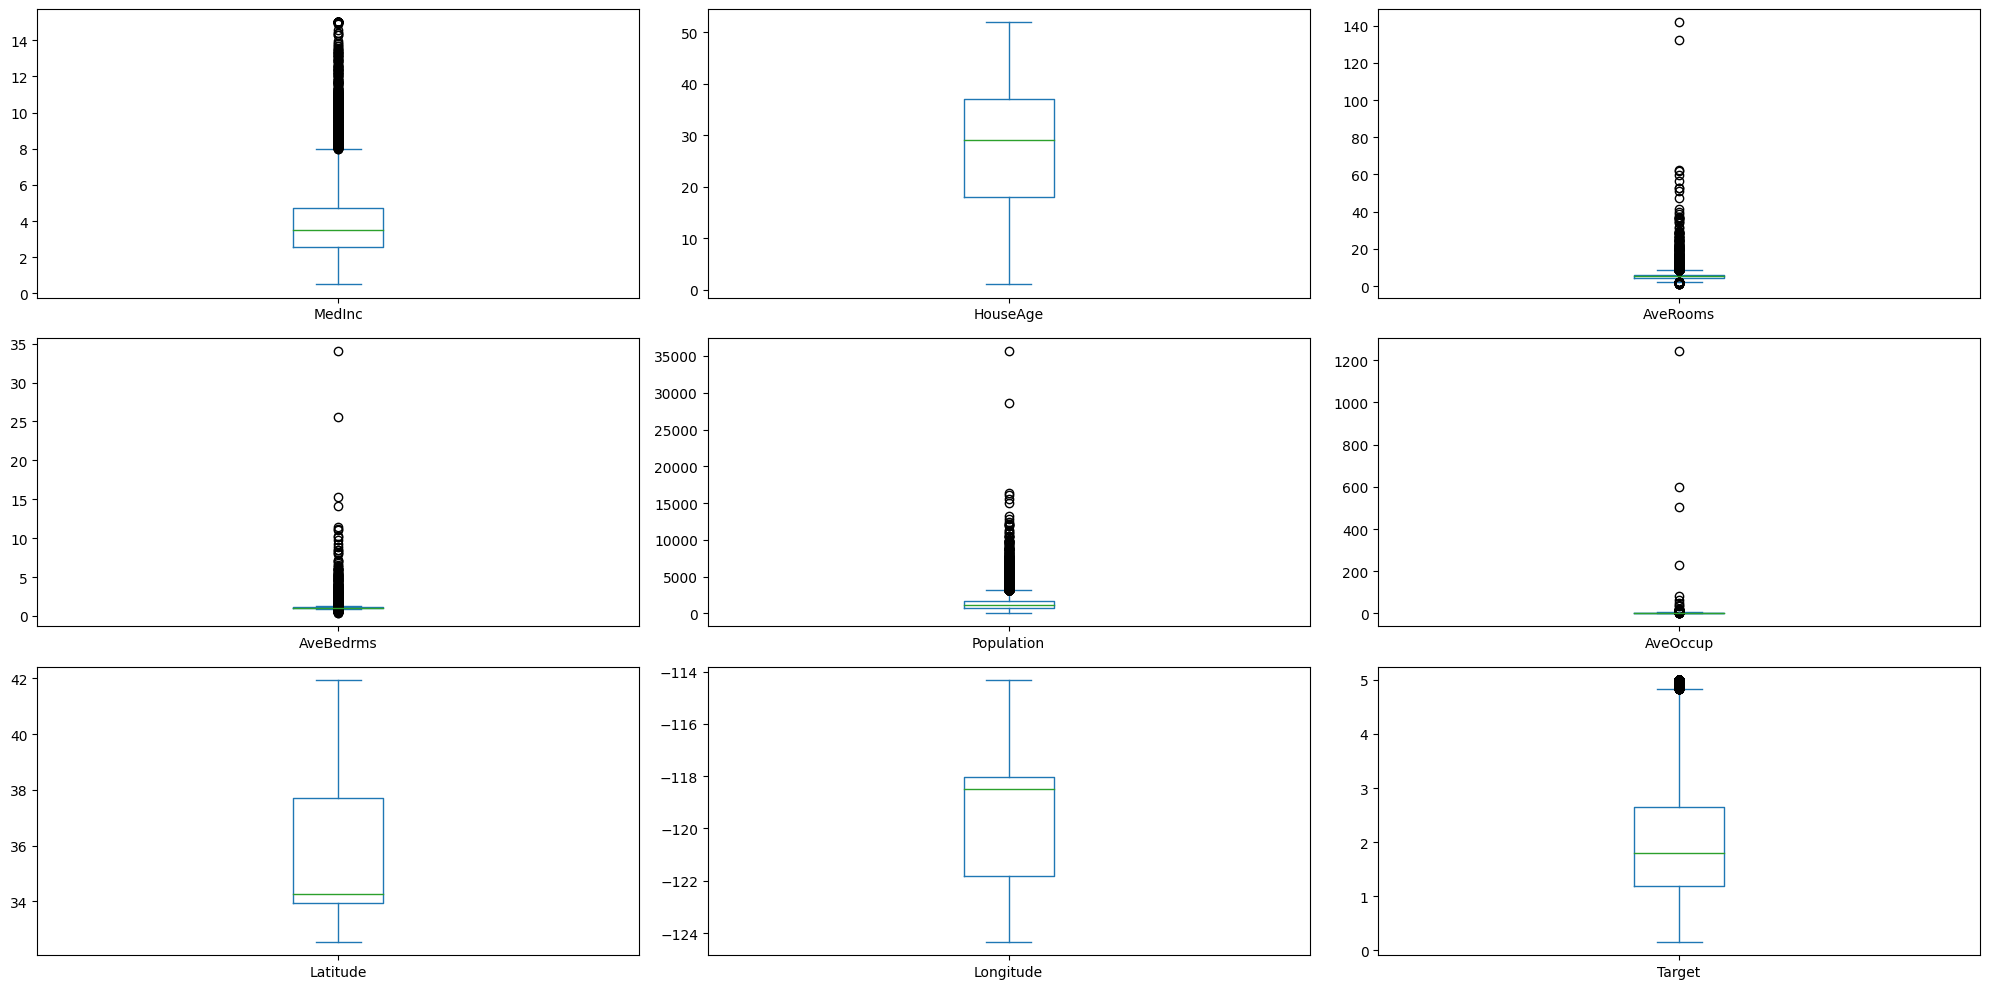

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3,figsize=(20,10))

for i,column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    df[[column]].plot(kind='box',ax=ax[row,col])
plt.tight_layout()
plt.show()

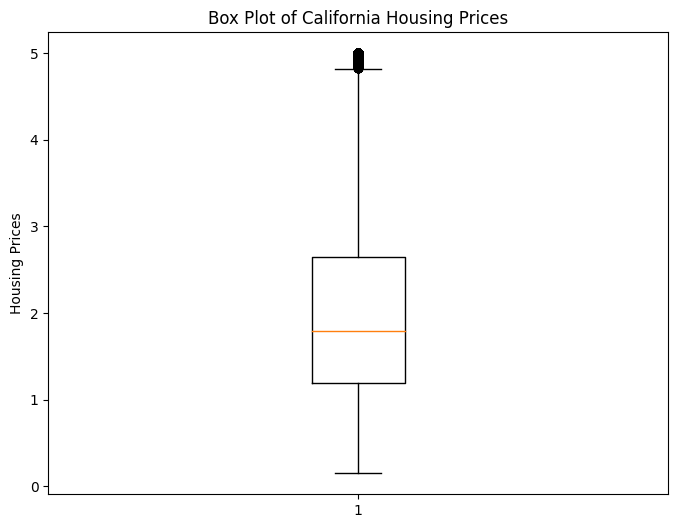

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

y = housing.target

plt.figure(figsize=(8,6))
plt.boxplot(y)
plt.title("Box Plot of California Housing Prices")
plt.ylabel("Housing Prices")
plt.show()

In [ ]:
cols = ['MedInc','AveRooms','AveBedrms','Population','AveOccup','Target']

for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3 - Q1

    outliers = df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]


    df = df.drop(outliers.index)
    print(outliers)
df.head()

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, Target]
Index: []
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, Target]
Index: []
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, Target]
Index: []
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, Target]
Index: []
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, Target]
Index: []
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, Target]
Index: []


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y  # Add the target variable to the DataFrame

# Calculate IQR for the target variable
Q1 = df['Target'].quantile(0.25)
Q3 = df['Target'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['Target'] < lower_bound) | (df['Target'] > upper_bound)]

# Output the observations corresponding to outliers
print(len(outliers))
outliers[:5]

1071


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001


In [ ]:
df_no_outliers = df[(df['Target'] >= lower_bound) & (df['Target'] <= upper_bound)]
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19569 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19569 non-null  float64
 1   HouseAge    19569 non-null  float64
 2   AveRooms    19569 non-null  float64
 3   AveBedrms   19569 non-null  float64
 4   Population  19569 non-null  float64
 5   AveOccup    19569 non-null  float64
 6   Latitude    19569 non-null  float64
 7   Longitude   19569 non-null  float64
 8   Target      19569 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


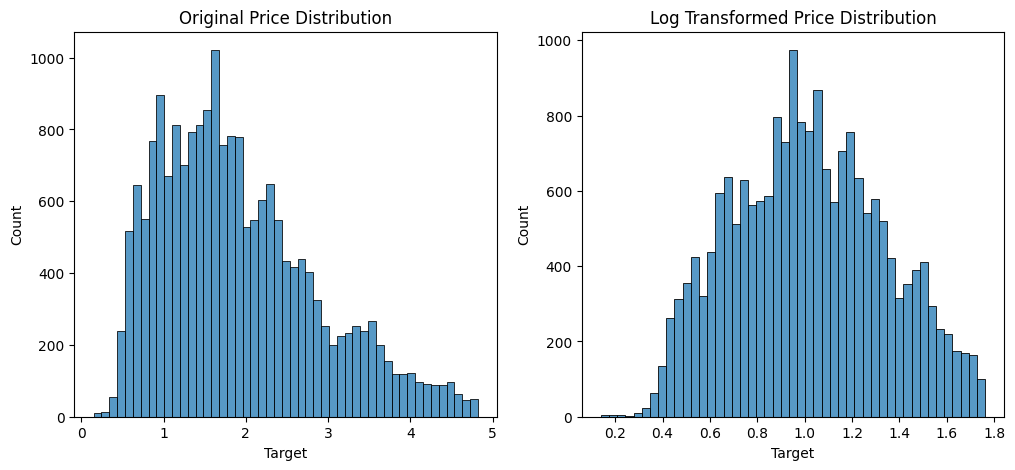

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1행 2열의 서브플롯 생성
fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)

# 원래 PRICE의 분포
sns.histplot(df_no_outliers['Target'], ax=axs[0])
axs[0].set_title('Original Price Distribution')

# 로그 변환된 PRICE의 분포
y_log = np.log1p(df_no_outliers['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')

# 그래프 표시
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 캘리포니아 주택 데이터셋 불러오기

X = df_no_outliers.drop(['Target'], axis=1)
# X = df_no_outliers.drop(['Target','Latitude'], axis=1)
y = df_no_outliers['Target']

# 타겟 변수에 로그 변환 적용
y_log = np.log1p(y)

# 데이터셋을 DataFrame으로 변환
df = pd.DataFrame(X, columns=housing.feature_names)

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 훈련
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 성능 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R² score

print("계수:", lin_reg.coef_)
print("절편:", lin_reg.intercept_)
print("평균 제곱 오차(MSE):", round(mse,2))
print("Root Mean Square Error (RMSE):", round(rmse,2))
print("R² Score:", round(r2,2))

계수: [ 0.22215106  0.02632994 -0.08906435  0.11029448  0.0058401  -0.01191286
 -0.31453419 -0.29994792]
절편: 1.016939473521205
평균 제곱 오차(MSE): 0.04
Root Mean Square Error (RMSE): 0.21
R² Score: 0.59


Task2_0729. alphas = [0, 0.1, 1, 10, 100]와 같이 주어졌을 때 다음을 수행하세요.
- alpha값에 따른 평균 RMSE
- alpha값에 따른 회귀계수의 변화

In [ ]:
# 릿지회귀
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
y_target = boston_df['PRICE']


X_train, X_test , y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state = 42)


alphas = [0, 0.1, 1, 10, 100]

for a in alphas:
    ridge  = Ridge(alpha=a)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # 교차 검증을 통한 평균 RMSE 계산
    cv_scores = cross_val_score(model,X_data, y_target, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()

    print(f"alphas값이 {a}일 때")
    print(f"회귀계수 : {ridge.coef_}")
    print(f"RMSE : {rmse:.2f}")
    print(f"평균 RMSE : {cv_rmse:.2f}")
    print()

alphas값이 0일 때
회귀계수 : [-9.63665382e-02  2.97433243e-02 -4.76026868e-03  3.52045516e+00
 -1.33472593e+01  4.27772209e+00 -1.49883511e-02 -1.36629554e+00
  1.03742613e-01  2.24012897e-03 -8.04717897e-01  1.09622673e-02
 -5.38246884e-01]
RMSE : 4.82
평균 RMSE : 5.72

alphas값이 0.1일 때
회귀계수 : [-9.59704501e-02  2.99986916e-02 -9.01542543e-03  3.49115416e+00
 -1.21960945e+01  4.27813909e+00 -1.59585911e-02 -1.34884253e+00
  1.03311591e-01  2.01464265e-03 -7.92702578e-01  1.10013062e-02
 -5.40724305e-01]
RMSE : 4.82
평균 RMSE : 5.72

alphas값이 1일 때
회귀계수 : [-9.41793191e-02  3.12607382e-02 -2.88331152e-02  3.29927936e+00
 -6.85631399e+00  4.26391329e+00 -2.02869763e-02 -1.26846079e+00
  1.01527125e-01  9.79789768e-04 -7.37929255e-01  1.11849972e-02
 -5.53714731e-01]
RMSE : 4.86
평균 RMSE : 5.72

alphas값이 10일 때
회귀계수 : [-9.27553534e-02  3.37310942e-02 -5.22540340e-02  2.38066225e+00
 -1.24758184e+00  3.96724326e+00 -2.20157848e-02 -1.18890295e+00
  1.01953577e-01  6.75722457e-05 -6.94962670e-01  1.13617478

Task1_0730. 교차 검증을 위한 사용자 함수를 생성한 후 아래 회귀트리 모델들에 대한 교차검증을 수행하세요.
- dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
- rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
- gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
- xgb_reg = XGBRegressor(n_estimators=1000)
- lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

# 사용자 함수 생성
def cross_val_eval(model, X, y):
    neg_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    sep_rmse = np.sqrt(-1 * neg_scores)
    avg_rmse = sep_rmse.mean()

    print('개별 Negative MSE scores : ', neg_scores)
    print('개별 RMSE scores : ', sep_rmse)
    print(f'평균 RMSE : {avg_rmse:.2f}')
    print()

boston = fetch_openml(name="Boston", parser='auto', version=1)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.drop(['CHAS','RAD'],axis=1,inplace=True)

y_target = boston_df.PRICE
X_data = boston_df.drop(['PRICE'], axis =1, inplace=False)


dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
cross_val_eval(dt_reg, X_data, y_target)


rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
cross_val_eval(rf_reg, X_data, y_target)

gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
cross_val_eval(gb_reg, X_data, y_target)

xgb_reg = XGBRegressor(n_estimators=1000)
cross_val_eval(xgb_reg, X_data, y_target)

lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)
cross_val_eval(lgb_reg, X_data, y_target)




개별 Negative MSE scores :  [-11.94208679 -36.25334211 -33.48039047 -46.05422718 -58.11885053]
개별 RMSE scores :  [3.45573245 6.02107483 5.7862242  6.78632649 7.62357203]
평균 RMSE : 5.93

개별 Negative MSE scores :  [ -7.97670356 -13.26536819 -20.57943314 -46.2909271  -18.92031706]
개별 RMSE scores :  [2.82430585 3.64216532 4.53645601 6.80374361 4.34974908]
평균 RMSE : 4.43

개별 Negative MSE scores :  [ -8.43362895 -14.12910722 -20.63512532 -39.88140575 -14.24271726]
개별 RMSE scores :  [2.9040711  3.75887047 4.54259015 6.31517266 3.77395247]
평균 RMSE : 4.26

개별 Negative MSE scores :  [ -7.73921451 -33.56048106 -26.22233236 -45.69449    -22.72599087]
개별 RMSE scores :  [2.78194438 5.79314086 5.12077459 6.75976997 4.7671785 ]
평균 RMSE : 5.04

개별 Negative MSE scores :  [ -9.21164053 -20.12127398 -19.57386325 -41.55756425 -22.29484224]
개별 RMSE scores :  [3.03506846 4.48567431 4.42423589 6.44651567 4.72174144]
평균 RMSE : 4.62



In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

Task2_0730. iris 데이터셋에 대하여 랜덤포레스트로 학습 및 평가한 결과와 차원축소한 후 c1,c2를 적용하여 학습 평가한 결과를 비교하셍요. (단 cross_val_score를 적용하여 평가)

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(iris.data, columns=columns)
df_iris['target'] = iris.target



def cross_val_eval(model, X, y):
    neg_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    sep_rmse = np.sqrt(-1 * neg_scores)
    avg_rmse = sep_rmse.mean()

    print('개별 Negative MSE scores : ', neg_scores)
    print('개별 RMSE scores : ', sep_rmse)
    print(f'평균 RMSE : {avg_rmse:.2f}')


rf = RandomForestRegressor()

X = df_iris.drop('target',axis=1)
y = df_iris['target']

cross_val_eval(rf, X, y)

개별 Negative MSE scores :  [-0.         -0.00229667 -0.11361667 -0.04620667 -0.11209   ]
개별 RMSE scores :  [0.         0.04792355 0.33707071 0.21495736 0.33479845]
평균 RMSE : 0.19


In [ ]:
df_iris1 = df_iris.drop('target',axis=1)

Scaled = StandardScaler().fit_transform(df_iris1)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(Scaled)

columns = ['components1','components2']
df_iris_pca = pd.DataFrame(iris_pca, columns=columns)
df_iris_pca['target'] = iris.target

X1 = df_iris_pca.drop('target',axis=1)
y1 = df_iris_pca['target']

rf = RandomForestRegressor()

cross_val_eval(rf, X1, y1)

개별 Negative MSE scores :  [-0.         -0.05279333 -0.1684     -0.09908    -0.21623667]
개별 RMSE scores :  [0.         0.229768   0.41036569 0.31476976 0.46501254]
평균 RMSE : 0.28


In [ ]:
# 분류를 적용한 결과 비교
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores)
print('평균 정확도 : {:.2f}'.format(np.mean(scores)))

cv=3인 경우의 개별 폴드 세트별 정확도: [0.98 0.94 0.96]
평균 정확도 : 0.96


In [ ]:
# PCA 변환 데이터 세트 적용
pca_X = df_iris_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores_pca)
print('평균 정확도 : {:.2f}'.format(np.mean(scores_pca)))

cv=3인 경우의 개별 폴드 세트별 정확도: [0.88 0.88 0.88]
평균 정확도 : 0.88


Task3_0730. 상관도가 높은 BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성에 대하여 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산하세요.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/credit_card.xls',sheet_name='Data', header=1)


df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop(['default','ID'], axis=1)

In [ ]:
df_bill_amt = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
scale = StandardScaler().fit_transform(df_bill_amt)

pca = PCA(n_components=2)
df_bill_scale = pca.fit_transform(scale)
# df_bill_scale.explained_variance_ratio_/

pca.explained_variance_ratio_

array([0.90555253, 0.0509867 ])

In [ ]:
# 상관도가 높은 속성을 PCA로 변환한 뒤 explained_variance_ratio_ 속성으로 확인
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 6개의 속성을 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
# 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명
print('PCA Component 별 변동성:', pca.explained_variance_ratio_)

Task4_0730. 신용카드 데이터셋 전체 23개 속성에 대하여 6개의 컴포넌트를 가진 PCA 변환을 수행하고 모델은 RF, cv=3, scoring='accuracy'을 적용하여 cross_val_score()로 분류 예측 수행하세요.

In [ ]:
df_pay = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
scale1 = StandardScaler().fit_transform(df_pay)

pca1 = PCA(n_components=4)
df_pay_scale = pca1.fit_transform(scale1)
# df_bill_scale.explained_variance_ratio_/

pca1.explained_variance_ratio_

array([0.71645838, 0.11674569, 0.06767707, 0.04428439])

In [ ]:
pay_amt = df.iloc[:,-7:]
credit_info = df.iloc[:,:6]

df_1 = pd.concat([credit_info,pay_amt],axis=1)
df_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,2000,36681,10000,9000,689,679,0


In [ ]:
df_bill_amt = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
scale = StandardScaler().fit_transform(df_bill_amt)

pca = PCA(n_components=2)
df_bill_scale = pca.fit_transform(scale)
df_bill = pd.DataFrame(df_bill_scale, columns=['BILL_AMT1','BILL_AMT2'])


df_pay = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
scale1 = StandardScaler().fit_transform(df_pay)

pca1 = PCA(n_components=4)
df_pay_scale = pca1.fit_transform(scale1)
df_pay = pd.DataFrame(df_pay_scale, columns=['PAY_1','PAY_2','PAY_3','PAY_4'])

df_scale = pd.concat([df_1, df_bill, df_pay],axis=1)
df_scale.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,BILL_AMT1,BILL_AMT2,PAY_1,PAY_2,PAY_3,PAY_4
0,1,20000,2,2,1,24,0,689,0,0,0,0,1,-1.611148,0.012479,-0.477471,-3.224644,-0.145043,-0.416041
1,2,120000,2,2,2,26,0,1000,1000,1000,0,2000,1,-1.547595,-0.062344,1.461637,0.853881,0.360869,-2.067658
2,3,90000,2,2,2,34,1518,1500,1000,1000,1000,5000,0,-1.035874,0.011256,0.393314,0.175558,-0.004886,-0.036088
3,4,50000,2,2,1,37,2000,2019,1200,1100,1069,1000,0,-0.250712,0.174374,0.393314,0.175558,-0.004886,-0.036088
4,5,50000,1,2,1,57,2000,36681,10000,9000,689,679,0,-0.968951,-0.213032,-0.273290,0.847431,0.045820,-0.342293


In [ ]:

def cross_val_eval(model, X, y):
    neg_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=3)
    sep_rmse = np.sqrt(-1 * neg_scores)
    avg_rmse = sep_rmse.mean()

    print('개별 Negative MSE scores : ', neg_scores)
    print('개별 RMSE scores : ', sep_rmse)
    print(f'평균 RMSE : {avg_rmse:.2f}')

rf = RandomForestRegressor()

X= df_scale.drop(['default','ID'], axis=1)
y = df_scale['default']

cross_val_eval(rf, X,y)

개별 Negative MSE scores :  [-0.14850503 -0.14315056 -0.13407216]
개별 RMSE scores :  [0.3853635  0.37835243 0.36615865]
평균 RMSE : 0.38


In [ ]:

def cross_val_eval_(model, X, y):
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=3)
    avg_accuracy = accuracy_scores.mean()

    print('개별 정확도 점수 : ', accuracy_scores)
    print(f'평균 정확도 : {avg_accuracy:.2f}')

rf = RandomForestClassifier()

X= df_scale.drop(['default','ID'], axis=1)
y = df_scale['default']

cross_val_eval_(rf, X,y)

개별 정확도 점수 :  [0.807  0.8195 0.8203]
평균 정확도 : 0.82


In [ ]:
# 원본 데이터 세트와 PCA 변환한 데이터 세트의 분류 예측 결과 비교

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=150)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

# 원본 데이터 세트의 분류 예측 결과

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8067 0.8214 0.8225]
평균 정확도:0.8169


In [ ]:
# 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측결과 보다
# 1~2% 정도의 예측 성능 저하만 발생
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)
rcf = RandomForestClassifier(n_estimators=300, random_state=150)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대한 동일한 분류 예측

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7925 0.7969 0.8019]
PCA 변환 데이터 세트 평균 정확도:0.7971
